## City of Charlotte Traffic Accident Geospatial Mapping
In this analysis project, I wish to plot geospatial coordinates of all serious traffic accidents from the City of Charlotte. I will also add parameters to plot points based on certain dates.

Being a Charlotte resident, I know a particular location which seems to average one accident every month or so. It will be interesting to see what we find.

resources: 

* https://plotly.com/python/scattermapbox/#mapbox-access-token-and-base-map-configuration

* https://www.mapbox.com/

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

import geopandas as gpd

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
import googlemaps

import plotly.express as px
import plotly.graph_objects as go


In [133]:
px.set_mapbox_access_token(open("mapbox_access_token.txt").read())

In [134]:
clt_df = pd.read_csv("Fatal_or_Serious_Injury_Crashes.csv")

In [135]:
clt_df

,X,Y,OBJECTID,CRSH_ID,DATE_VAL_Y,DATE_VAL_M,DATE_VAL_1,DATE_VAL_D,DAY_OF_WEE,DAY_OF_W_1,...,CRSH_TYPE_,CRASH_TYPE,CRSH_LEVL,PRIMARY_CA,PRIMARY__1,SECONDARY_,SECONDARY1,LATITUDE,LONGITUDE,StreetID
0,1.425599e+06,519765.187106,3745,767965,2016,6,June,9,5,Thursday,...,14,Pedestrian,2,26,"Operated vehicle in erratic, reckless, careles...",0,,35.162879,-80.922041,NaN
1,1.467687e+06,477272.897731,3746,945507,2019,4,April,25,5,Thursday,...,23,"Left turn, same roadway",2,19,Failed to yield right of way,0,,35.048298,-80.778692,NaN
2,1.418835e+06,541631.050231,3747,766801,2016,3,March,22,3,Tuesday,...,30,Angle,2,20,Inattention,0,,35.222586,-80.946103,NaN
3,1.476559e+06,539516.628356,3748,1033858,2020,7,July,17,6,Friday,...,2,Ran off road left,2,0,No contributing circumstance indicated,0,,35.219732,-80.752722,NaN
4,1.421123e+06,561005.398356,3749,902046,2018,7,July,14,7,Saturday,...,15,Pedalcyclist,1,0,,0,,35.275933,-80.939708,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1.437238e+06,531350.864606,4515,755564,2016,3,March,18,6,Friday,...,28,"Sideswipe, same direction",2,33,Unable to determine,0,,35.195320,-80.883840,NaN
771,1.473839e+06,565156.435856,4516,991963,2019,12,December,22,1,Sunday,...,28,"Sideswipe, same direction",2,34,Unknown,0,,35.290038,-80.763353,NaN
772,1.468237e+06,549164.527731,4517,1012202,2020,4,April,3,6,Friday,...,2,Ran off road left,2,0,No contributing circumstance indicated,0,,35.245830,-80.781164,NaN
773,1.461290e+06,569403.608981,4518,998949,2020,1,January,25,7,Saturday,...,2,Ran off road left,2,6,Exceeded authorized speed limit,0,,35.301086,-80.805660,NaN


In [136]:
clt_df.describe()

,X,Y,OBJECTID,CRSH_ID,DATE_VAL_Y,DATE_VAL_M,DATE_VAL_D,DAY_OF_WEE,MILT_TIME,CASE_NUM,CRSH_TYPE_,CRSH_LEVL,PRIMARY_CA,SECONDARY_,LATITUDE,LONGITUDE,StreetID
count,7.750000e+02,775.000000,775.00000,7.750000e+02,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,0.0
mean,1.453085e+06,541944.761706,4132.00000,9.019423e+05,2017.965161,6.348387,15.402581,4.224516,1327.443871,2.018146e+13,16.069677,1.554839,11.798710,0.005161,35.225213,-80.831448,NaN
std,2.279009e+04,22387.482279,223.86752,9.644996e+04,1.443178,3.364570,8.821690,2.102949,715.770595,3.477177e+10,10.082235,0.497305,11.216947,0.143684,0.061661,0.076138,NaN
min,1.399609e+06,472086.588981,3745.00000,7.420140e+05,2016.000000,1.000000,1.000000,1.000000,1.000000,2.015011e+13,1.000000,1.000000,0.000000,0.000000,35.033647,-81.007454,NaN
25%,1.435193e+06,529073.519606,3938.50000,8.172095e+05,2017.000000,3.000000,7.000000,2.000000,720.000000,2.017022e+13,13.000000,1.000000,0.000000,0.000000,35.189870,-80.891344,NaN
50%,1.452398e+06,543984.932106,4132.00000,8.942030e+05,2018.000000,6.000000,16.000000,5.000000,1507.000000,2.018053e+13,14.000000,2.000000,7.000000,0.000000,35.230105,-80.833913,NaN
75%,1.471829e+06,556850.127419,4325.50000,9.893130e+05,2019.000000,9.000000,23.000000,6.000000,1955.500000,2.019102e+13,23.000000,2.000000,20.000000,0.000000,35.265872,-80.769464,NaN
max,1.506144e+06,600989.277731,4519.00000,1.076587e+06,2020.000000,12.000000,31.000000,7.000000,2358.000000,2.106071e+13,60.000000,2.000000,38.000000,4.000000,35.388232,-80.654049,NaN


In [137]:
clt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           775 non-null    float64
 1   Y           775 non-null    float64
 2   OBJECTID    775 non-null    int64  
 3   CRSH_ID     775 non-null    int64  
 4   DATE_VAL_Y  775 non-null    int64  
 5   DATE_VAL_M  775 non-null    int64  
 6   DATE_VAL_1  775 non-null    object 
 7   DATE_VAL_D  775 non-null    int64  
 8   DAY_OF_WEE  775 non-null    int64  
 9   DAY_OF_W_1  775 non-null    object 
 10  MILT_TIME   775 non-null    int64  
 11  CASE_NUM    775 non-null    int64  
 12  CRSH_TYPE_  775 non-null    int64  
 13  CRASH_TYPE  775 non-null    object 
 14  CRSH_LEVL   775 non-null    int64  
 15  PRIMARY_CA  775 non-null    int64  
 16  PRIMARY__1  775 non-null    object 
 17  SECONDARY_  775 non-null    int64  
 18  SECONDARY1  775 non-null    object 
 19  LATITUDE    775 non-null    f

We are provided the type of crash, let's get a glimpse of how many of them we have.

In [138]:
clt_df['CRASH_TYPE'].value_counts()

Pedestrian                             207
Ran off road right                     107
Rear end, slow or stop                  71
Ran off road left                       66
Left turn, same roadway                 65
Head on                                 46
Angle                                   45
Left turn, different roadways           44
Sideswipe, same direction               28
Pedalcyclist                            22
Parked motor vehicle                    10
Other non-collision*                     7
Ran off road straight ahead              7
Backing up                               6
Right turn, different roadways           6
Fixed object                             6
Crossed centerline/median                5
Sideswipe, opposite direction            5
Overturn/rollover                        5
Other collision with vehicle*            3
Rear end, turn                           3
Median barrier end (non-guardrail)       3
Right turn, same roadway                 3
Guardrail f

The top category is nearly doulbe that of the second highest. We can utilize geopandas to visualize where all of these accidents are happening.

Next, using the below as an example from the guide on plotly's documentation, we can create a similar map for the City of Charlotte.

In [139]:
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [140]:
clt_df.head()

,X,Y,OBJECTID,CRSH_ID,DATE_VAL_Y,DATE_VAL_M,DATE_VAL_1,DATE_VAL_D,DAY_OF_WEE,DAY_OF_W_1,...,CRSH_TYPE_,CRASH_TYPE,CRSH_LEVL,PRIMARY_CA,PRIMARY__1,SECONDARY_,SECONDARY1,LATITUDE,LONGITUDE,StreetID
0,1.425599e+06,519765.187106,3745,767965,2016,6,June,9,5,Thursday,...,14,Pedestrian,2,26,"Operated vehicle in erratic, reckless, careles...",0,,35.162879,-80.922041,NaN
1,1.467687e+06,477272.897731,3746,945507,2019,4,April,25,5,Thursday,...,23,"Left turn, same roadway",2,19,Failed to yield right of way,0,,35.048298,-80.778692,NaN
2,1.418835e+06,541631.050231,3747,766801,2016,3,March,22,3,Tuesday,...,30,Angle,2,20,Inattention,0,,35.222586,-80.946103,NaN
3,1.476559e+06,539516.628356,3748,1033858,2020,7,July,17,6,Friday,...,2,Ran off road left,2,0,No contributing circumstance indicated,0,,35.219732,-80.752722,NaN
4,1.421123e+06,561005.398356,3749,902046,2018,7,July,14,7,Saturday,...,15,Pedalcyclist,1,0,,0,,35.275933,-80.939708,NaN


Using the below as a template, we can construct custom maps like this one and analyze findings using certain parameters if we like. First let's clean the data up a little and create a singular date column.

In [141]:
dates = pd.to_datetime(clt_df['DATE_VAL_Y'].astype(str) +'-'+ clt_df['DATE_VAL_M'].astype(str) +'-'+ clt_df['DATE_VAL_D'].astype(str))

In [142]:
clt_df['DATE'] = dates
clt_df.drop(columns=['DATE_VAL_Y', 'DATE_VAL_M', 'DATE_VAL_D'], inplace=True)

In [143]:
clt_df.head()

,X,Y,OBJECTID,CRSH_ID,DATE_VAL_1,DAY_OF_WEE,DAY_OF_W_1,MILT_TIME,CASE_NUM,CRSH_TYPE_,CRASH_TYPE,CRSH_LEVL,PRIMARY_CA,PRIMARY__1,SECONDARY_,SECONDARY1,LATITUDE,LONGITUDE,StreetID,DATE
0,1.425599e+06,519765.187106,3745,767965,June,5,Thursday,1750,20160609184900,14,Pedestrian,2,26,"Operated vehicle in erratic, reckless, careles...",0,,35.162879,-80.922041,NaN,2016-06-09
1,1.467687e+06,477272.897731,3746,945507,April,5,Thursday,1602,20190425160200,23,"Left turn, same roadway",2,19,Failed to yield right of way,0,,35.048298,-80.778692,NaN,2019-04-25
2,1.418835e+06,541631.050231,3747,766801,March,3,Tuesday,829,20160322082900,30,Angle,2,20,Inattention,0,,35.222586,-80.946103,NaN,2016-03-22
3,1.476559e+06,539516.628356,3748,1033858,July,6,Friday,1730,20200717221400,2,Ran off road left,2,0,No contributing circumstance indicated,0,,35.219732,-80.752722,NaN,2020-07-17
4,1.421123e+06,561005.398356,3749,902046,July,7,Saturday,2010,20180714201000,15,Pedalcyclist,1,0,,0,,35.275933,-80.939708,NaN,2018-07-14


I will rearrange the columns so that the date column comes first.

In [144]:
new_col_order = ['DATE']
new_col_order.extend(clt_df.columns.tolist()[:-1])

In [145]:
clt_df = clt_df[new_col_order]

In [146]:
clt_df.head()

,DATE,X,Y,OBJECTID,CRSH_ID,DATE_VAL_1,DAY_OF_WEE,DAY_OF_W_1,MILT_TIME,CASE_NUM,CRSH_TYPE_,CRASH_TYPE,CRSH_LEVL,PRIMARY_CA,PRIMARY__1,SECONDARY_,SECONDARY1,LATITUDE,LONGITUDE,StreetID
0,2016-06-09,1.425599e+06,519765.187106,3745,767965,June,5,Thursday,1750,20160609184900,14,Pedestrian,2,26,"Operated vehicle in erratic, reckless, careles...",0,,35.162879,-80.922041,NaN
1,2019-04-25,1.467687e+06,477272.897731,3746,945507,April,5,Thursday,1602,20190425160200,23,"Left turn, same roadway",2,19,Failed to yield right of way,0,,35.048298,-80.778692,NaN
2,2016-03-22,1.418835e+06,541631.050231,3747,766801,March,3,Tuesday,829,20160322082900,30,Angle,2,20,Inattention,0,,35.222586,-80.946103,NaN
3,2020-07-17,1.476559e+06,539516.628356,3748,1033858,July,6,Friday,1730,20200717221400,2,Ran off road left,2,0,No contributing circumstance indicated,0,,35.219732,-80.752722,NaN
4,2018-07-14,1.421123e+06,561005.398356,3749,902046,July,7,Saturday,2010,20180714201000,15,Pedalcyclist,1,0,,0,,35.275933,-80.939708,NaN


In [147]:

fig = px.scatter_mapbox(clt_df, lat="LATITUDE", lon="LONGITUDE",  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

Would it become more visually appealing if we set color and size to the type of accident?

In [148]:
#df = px.data.carshare()
fig = px.scatter_mapbox(clt_df, lat="LATITUDE", lon="LONGITUDE", color="CRASH_TYPE",  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

How about if we filter records down by date? We can set the min and max dates as well

In [149]:
print(pd.to_datetime(clt_df['DATE'].min()))
print(clt_df['DATE'].max())

2016-01-01 00:00:00
2020-12-31 00:00:00


In [150]:
fil_clt_df = clt_df[clt_df['DATE'].between('2016-01-01', '2018-01-01')]


fig = px.scatter_mapbox(fil_clt_df, lat="LATITUDE", lon="LONGITUDE", color="CRASH_TYPE",  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

Now we can filter down the dataframe by date. Within the StreamLit app, we can also multiselect the Crash Type if we wish.

I will save the dataframe used here with the formatted date column for easier processing later on.

In [151]:
clt_df.to_csv("updated_crash_incidents.csv")

## EDA
Let's explore some aspects of the crash reports.

In [152]:
clt_df.columns

Index(['DATE', 'X', 'Y', 'OBJECTID', 'CRSH_ID', 'DATE_VAL_1', 'DAY_OF_WEE',
       'DAY_OF_W_1', 'MILT_TIME', 'CASE_NUM', 'CRSH_TYPE_', 'CRASH_TYPE',
       'CRSH_LEVL', 'PRIMARY_CA', 'PRIMARY__1', 'SECONDARY_', 'SECONDARY1',
       'LATITUDE', 'LONGITUDE', 'StreetID'],
      dtype='object')

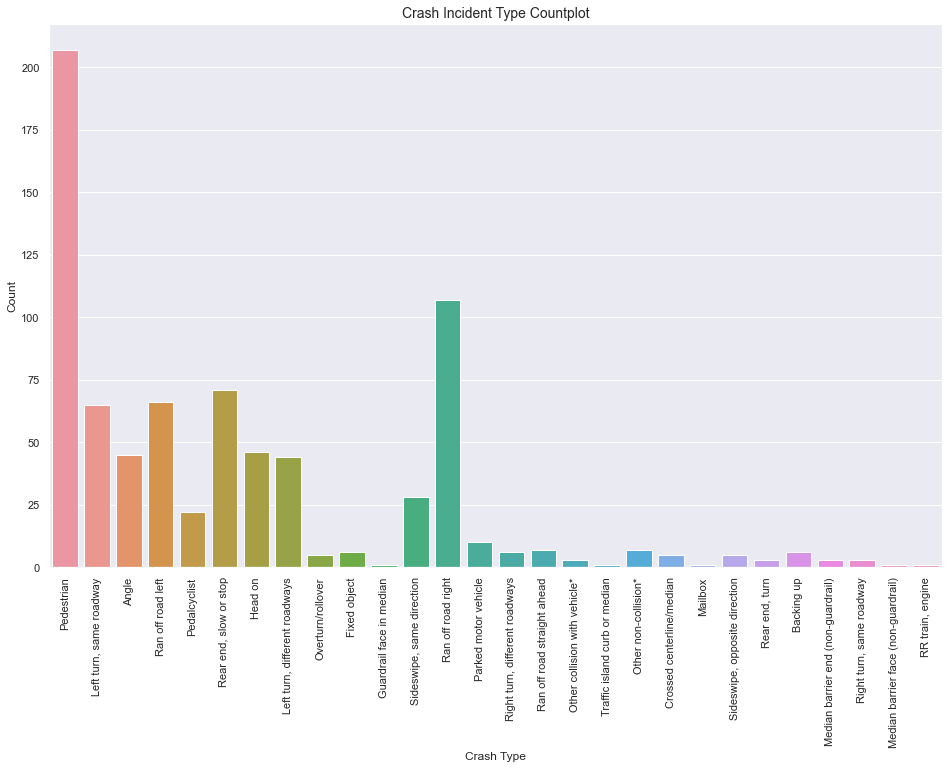

In [153]:
plt.figure(figsize=(16,10))
sns.countplot(x='CRASH_TYPE', data=clt_df)
plt.xticks(rotation=90)
plt.title("Crash Incident Type Countplot", fontsize=14)
plt.xlabel("Crash Type")
plt.ylabel("Count")
plt.show()

The majority of records belong to Pedestrian and running off the road to the right. Where are these incidents taking place? Are they in common locations?

In [154]:
common_crashes = ['pedestrian', 'Ran off road right']

fil_clt_df = clt_df[clt_df['CRASH_TYPE'].isin(common_crashes)]

fig = px.scatter_mapbox(fil_clt_df, lat="LATITUDE", lon="LONGITUDE", color="CRASH_TYPE",  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [155]:
counts_df = clt_df.groupby('DATE').agg({'OBJECTID':'count'})

In [156]:
counts_df

,OBJECTID
DATE,
2016-01-01,1
2016-01-05,1
2016-01-07,2
2016-01-15,2
2016-01-17,1
...,...
2020-12-20,1
2020-12-23,1
2020-12-24,1


In [157]:
figure = px.line(counts_df, width=1200, height=600, title='Crash Indicents over Time', labels={'DATE':'Date', 'value':'Count'})
figure.show()